In [3]:
# Standard libraries for system operations and numerical processing
import sys
import numpy as np

# GDAL: Library for reading and processing geospatial data formats
from osgeo import gdal
gdal.UseExceptions()

# Matplotlib: Optional library for plotting (if needed for additional visualization)
import matplotlib.pyplot as plt

# PyQt5 modules for building the graphical user interface (GUI)
from PyQt5.QtWidgets import (
    QApplication, QLabel, QMainWindow, QVBoxLayout, QWidget,
    QLineEdit, QPushButton, QHBoxLayout, QScrollArea
)
from PyQt5.QtGui import QPixmap, QImage, QPainter, QColor, QPen  # GUI elements and drawing tools
from PyQt5.QtCore import Qt, QEvent  # Core Qt functionalities and event handling


Image Dimensions: 1197 x 1005
Number of Bands: 3
Pixel Resolution: 8.96994132700715e-06 (width) x 8.969941327007627e-06 (height)


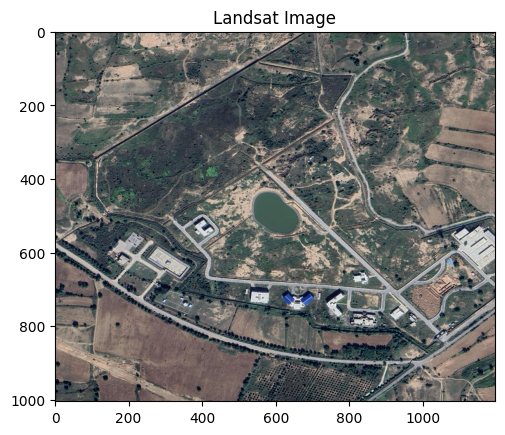

In [4]:
# Define the file path for the GeoTIFF image
file_path = "testGeoTiff.tif"

# Open the GeoTIFF file using GDAL
dataset = gdal.Open(file_path)
if dataset is None:
    raise FileNotFoundError(f"Unable to open {file_path}")

# Print basic metadata: image dimensions, number of bands, and pixel resolution

# Get image dimensions (width and height in pixels)
width = dataset.RasterXSize
height = dataset.RasterYSize
print(f"Image Dimensions: {width} x {height}")

# Get the number of bands in the dataset
num_bands = dataset.RasterCount
print(f"Number of Bands: {num_bands}")

# Retrieve geotransform parameters to extract pixel resolution information.
# The geotransform returns a tuple: 
# (top left x, pixel width, rotation, top left y, rotation, pixel height)
geotransform = dataset.GetGeoTransform()
if geotransform:
    pixel_width = geotransform[1]
    # The pixel height is usually negative; take the absolute value for resolution.
    pixel_height = abs(geotransform[5])
    print(f"Pixel Resolution: {pixel_width} (width) x {pixel_height} (height)")
else:
    print("No geotransform information available.")

# Read the first three bands (assuming the image is an RGB composite)
band1 = dataset.GetRasterBand(1).ReadAsArray()
band2 = dataset.GetRasterBand(2).ReadAsArray()
band3 = dataset.GetRasterBand(3).ReadAsArray()

# Stack the three bands along the third axis to form an RGB image array
rgb_image = np.dstack((band1, band2, band3))

# Display the RGB image in a separate window using matplotlib
plt.figure()
plt.imshow(rgb_image)
plt.title("Landsat Image")
plt.show()
